In [1]:
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
access_token = "xxx"
access_token_secret = "xxx"
consumer_key = "xxx"
consumer_secret = "xxx"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [32]:
#Define a function that will take our search query, a limit of 1000 tweets by default, default to english language
#and allow us to pass a list of words to remove from the string
def tweetSearch(query, limit = 1000, language = "en", remove = []):
    
    #Create a blank variable
    text = ""
    
    #Iterate through Twitter using Tweepy to find our query in our language, with our defined limit
    #For every twett that has our query, add it to our text holer in lower case 
    for tweet in tweepy.Cursor(api.search, q=query, lang=language).items(limit):
        text += tweet.text.lower()
        
    #Twitter has lots of links, we need to remove the common parts of links to clean our data
    #Firstly, create a list of terms that we want to remove. This contains https & co, alongside any words in our remove list
    removeWords = ["https",".co","corbynistateen"]
    removeWords += remove
    
    #For each word in our removeWords list, replace it with nothing in our main text - deleting it
    for word in removeWords:
        text = text.replace(word, "")
        
    #return our clean text
    return text

In [33]:
#Generate our text with our new function
#Remove all mentions of the name itself, as this will obviously be the most common!
Colston = tweetSearch("Colston", remove = ["colston"])

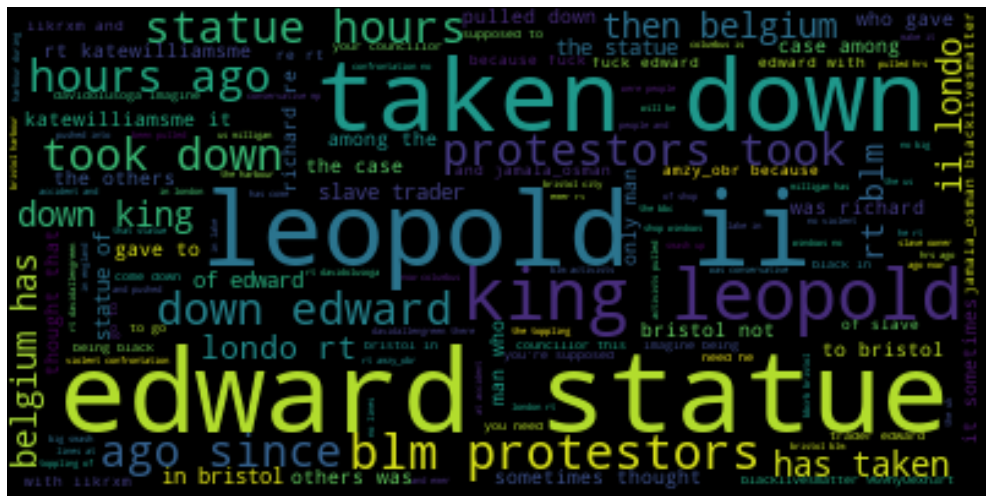

In [34]:
wordcloud = WordCloud().generate(Colston)

#Plot the text with the lines below
plt.figure(figsize=(18,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

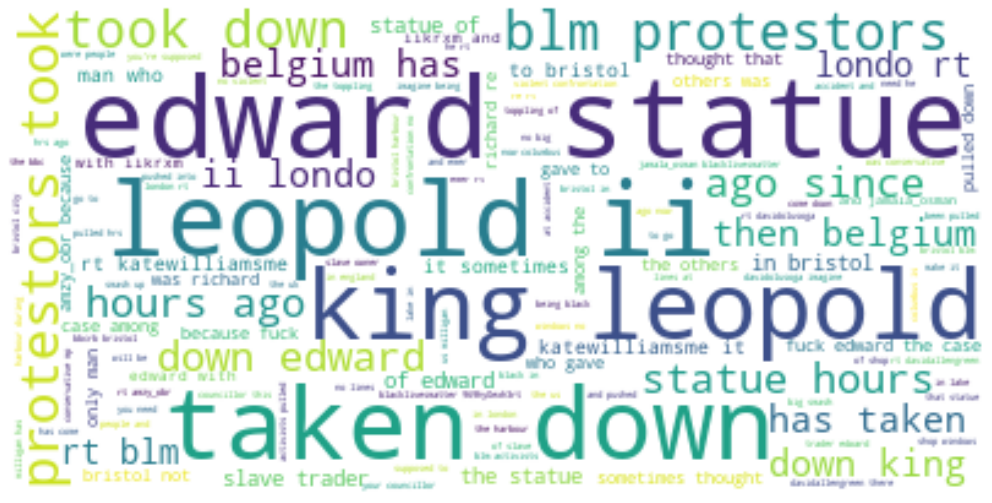

In [37]:
wordcloud = WordCloud(background_color="white").generate(Colston)

#Plot the text with the lines below
plt.figure(figsize=(18,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()